In [12]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin1') 
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5514,ham,Oh... Okie lor...We go on sat...,NaN,NaN,NaN
3699,ham,Oh...i asked for fun. Haha...take care. Ì_,NaN,NaN,NaN
3131,ham,I've been barred from all B and Q stores for l...,NaN,NaN,NaN
2674,ham,I am 6 ft. We will be a good combination!,NaN,NaN,NaN
345,ham,Gudnite....tc...practice going on,NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

In [ ]:
# 1. Data cleaning , removing NaN values
# 2. EDA (exploratory data analysis
# 3. Text Preprocessing (vectorizing, etc)
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Converting to website
# 8. Deploy website on Heroku

## 1. Data cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
# drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

df.sample(5)

,v1,v2
2856,ham,Today i'm not workin but not free oso... Gee.....
456,ham,"LOOK AT AMY URE A BEAUTIFUL, INTELLIGENT WOMAN..."
3660,ham,Well then you have a great weekend!
1346,ham,Is it ok if I stay the night here? Xavier has ...
5140,ham,Yeah I imagine he would be really gentle. Unli...


In [17]:
# renaming the columns

df.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
2554,ham,I'll reach in ard 20 mins ok...
2845,ham,Wat time u finish ur lect today?
5286,ham,I'm still pretty weak today .. Bad day ?
329,ham,I'm reading the text i just sent you. Its mean...
220,ham,Ok no prob. Take ur time.


In [74]:
from sklearn.preprocessing import LabelEncoder

## converting 'ham' to 0 and 'spam' to 1

encoder = LabelEncoder()

# Cast the transformed values to a compatible dtype
transformed_target = encoder.fit_transform(df['target']).astype(df['target'].dtype)

# Assign the transformed values to the DataFrame using .loc
df.loc[:, 'target'] = transformed_target


In [75]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [22]:
# check missing values
df.isnull().sum()


target    0
text      0
dtype: int64

In [23]:
# check for duplicate values
df.duplicated().sum()


403

In [25]:
# Remove duplicates
df = df.drop_duplicates(keep='first')

In [27]:
df.duplicated().sum()

0

In [28]:
df.shape  # After removing duplicates how much data remaining

(5169, 2)

## 2. EDA


In [76]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [30]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

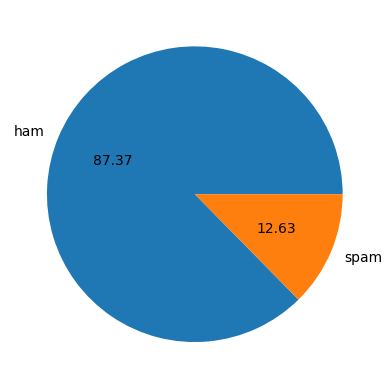

In [35]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [34]:
# Data is imbalanced as ham is more than spam

In [37]:
import nltk

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Tejas
[nltk_data]     Birje\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [55]:
# making three columns 1st - no. of chars , 2nd - no. of words, 3rd - no. of sentences

# num of chars

df.loc[:, 'num_characters'] = df['text'].apply(len)

In [77]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [95]:
# num of words

df.loc[:,'num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) # each sms is broken into a list of its words

# so by using len() we get number of words used in each sms


In [97]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [98]:
# num of sentences

df.loc[:,'num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) # Breaking each sms into its sentences returning a list of those sentences

# so by using len() we get number of sentences used in each sms

In [94]:
df.head()  # Hence we made 3 columns 

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [99]:
df[['num_characters','num_words','num_sentences']].describe()  # To getr description of dataset eg. mean, max, min ,etc

,num_characters,num_words,num_sentences
count,5170.000000,5170.000000,5170.000000
mean,78.962669,18.452224,1.965184
std,58.241018,13.325941,1.448659
min,0.000000,0.000000,0.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [100]:
# ham messages description

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [101]:
# spam messages description

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [84]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

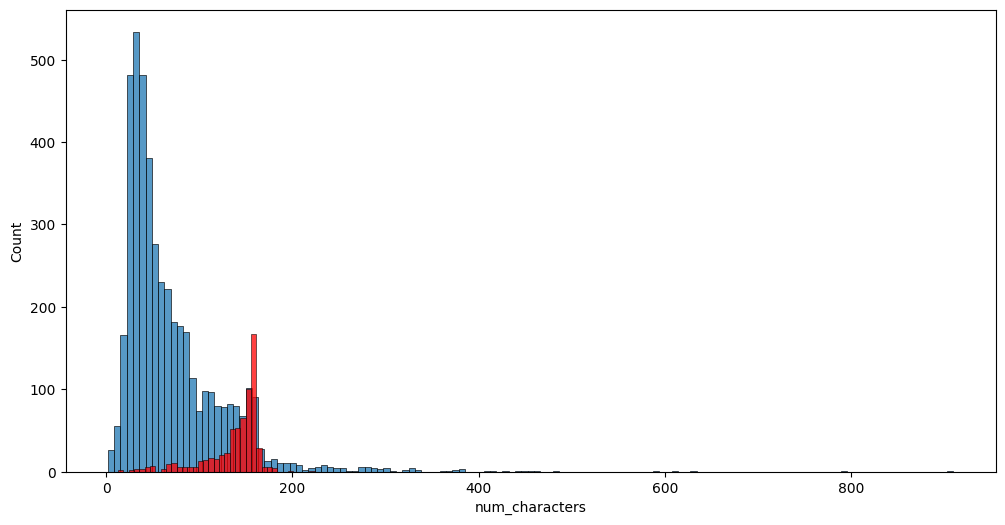

In [102]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

# So from the histogram we see in spam msgs have less characters

<Axes: xlabel='num_words', ylabel='Count'>

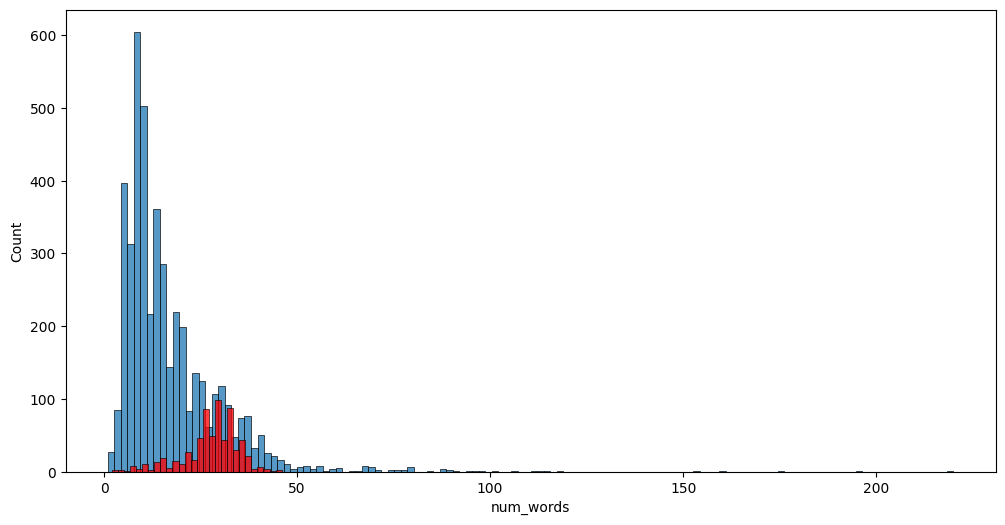

In [103]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

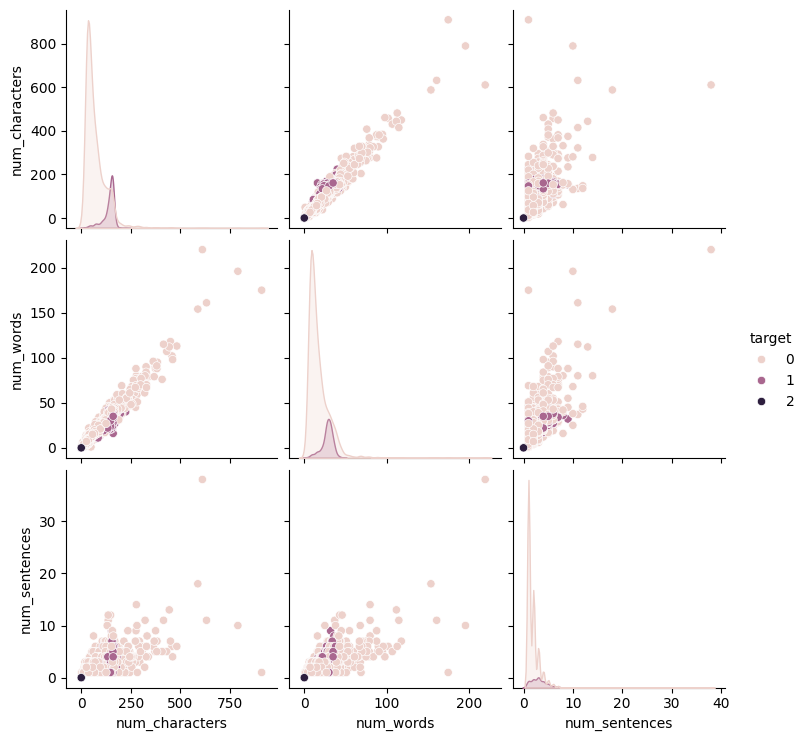

In [104]:
sns.pairplot(df,hue='target')

<Axes: >

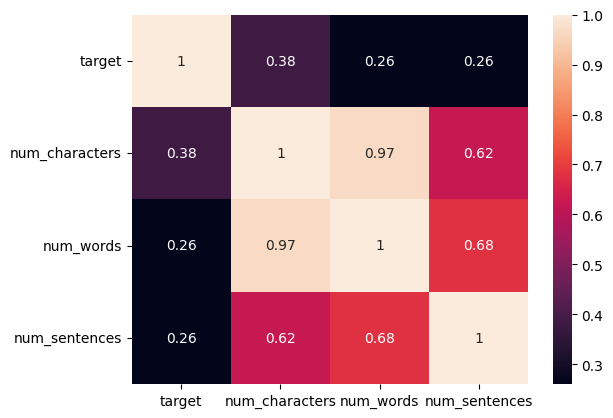

In [109]:
# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['int', 'float']).columns

# Drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_columns)

# Generate the heatmap of correlation coefficients
sns.heatmap(df_numeric.corr(), annot=True)


In [110]:
# So we decide to keep num_characters columns because there is strong relation between it and being spam or ham
# and also its corr is 0.38, more than other 2 coloumns

## 3. Data Preprocessing
## Lower case
## Tokenization
## Removing special characters¶
## removing stop words and punctuation
## stemming


In [111]:
# stop words --> is , of , the ,and , which don;t contribute to the meaning of the sentence
# stemming --> converting similar words into one word eg. dance, dancing, danced is converted to dance


In [139]:
def transform_text(text):  # Does Preprocessing and gives a new text 
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i) # basically removing % @ ! special characters as these are not alphanumeric and we are only keeping alphnumeric
        

    # cloning y in text
    text = y[:] # updated text (removed special characters) 
    y.clear()

    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text: 
        y.append(ps.stem(i)) # doing stemming ( removing ed, ing, e , etc)

    return " ".join(y) # returning as string 
            
    
    


In [143]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [127]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Tejas
[nltk_data]     Birje\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [128]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [137]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('danced') # basically removing 


'danc'

In [141]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [146]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Tejas Birje\AppData\Local\Temp\ipykernel_12744\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [147]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [148]:
# so from now on we will use only target and transformed_text columns

In [157]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [158]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

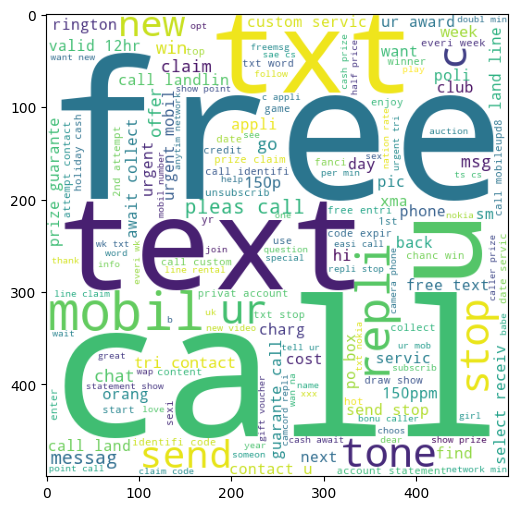

In [160]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc) # showing words which usually in a spam message 

In [161]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

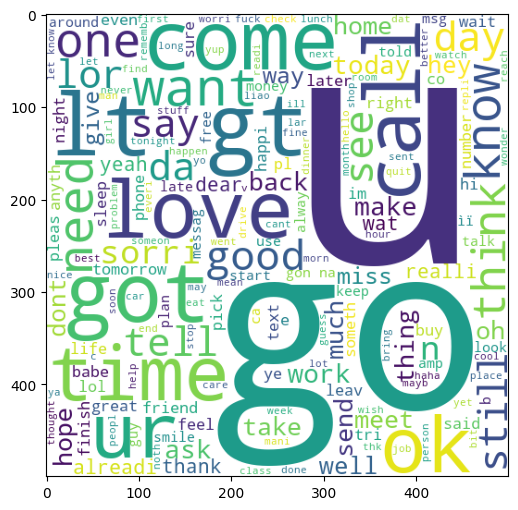

In [162]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc) # showing words which usually in a ham message 

In [163]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [166]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [167]:
len(spam_corpus)

9939

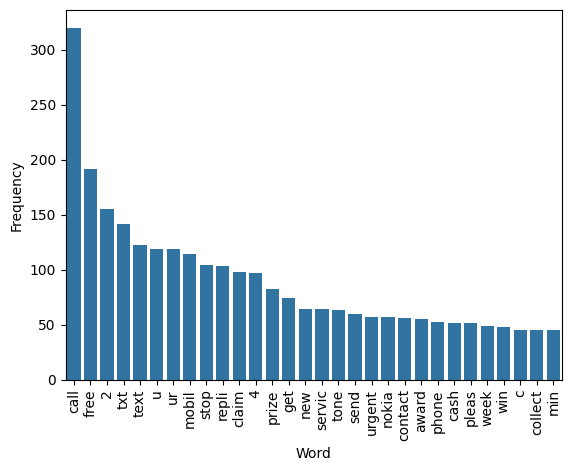

In [175]:
from collections import Counter

# Assuming spam_corpus is a list of words
# Replace spam_corpus with your actual list of words

# Create a Counter object to count the occurrences of each word
word_counts = Counter(spam_corpus)

# Convert Counter object to a DataFrame
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
sns.barplot(x=word_counts_df['Word'], y=word_counts_df['Frequency'])

plt.xticks(rotation='vertical')
plt.show()



In [176]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

from collections import Counter

# Assuming spam_corpus is a list of words
# Replace spam_corpus with your actual list of words

In [177]:
len(ham_corpus)

35404

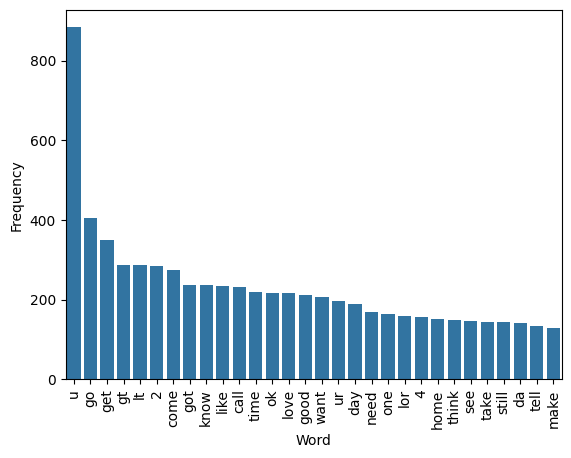

In [178]:
from collections import Counter

word_counts = Counter(ham_corpus)

# Convert Counter object to a DataFrame
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
sns.barplot(x=word_counts_df['Word'], y=word_counts_df['Frequency'])

plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [254]:
# Text Vectorization
# using Bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [255]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf  = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()


In [256]:
X.shape

(5170, 3000)

In [257]:
y = df['target'].values

In [258]:
y

array([0, 0, 1, ..., 0, 0, 2], dtype=int64)

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2) # testing 20% 

In [261]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [262]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [250]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='macro'))

0.8558994197292069
[[774 122   4]
 [ 22 111   1]
 [  0   0   0]]
0.482918886276878


In [263]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='binary'))

0.971953578336557
[[900   0]
 [ 29 105]]
1.0


In [252]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='binary'))

0.9816247582205029
[[899   1]
 [ 18 116]]
0.9914529914529915


In [253]:
# Improving Model
# 1. Change the max_features parameter of Tfidf

In [264]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))